In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Ruta del archivo
file_path = '/content/drive/MyDrive/Py_Reg_Fonseca_Ponce/Clima_Aus.csv'

# Cargar el dataset
data = pd.read_csv(file_path)

# Ver las primeras filas para verificar
print(data.head())


         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7    

# Explorar datos

## Preprocesamiento de los datos

In [ ]:
print(data.columns)


Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


In [ ]:
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
# Filtrar las columnas de interés
f_data = data[['MaxTemp', 'Humidity3pm']]

# Verificar las primeras filas
print(f_data.head())


   MaxTemp  Humidity3pm
0     22.9         22.0
1     25.1         25.0
2     25.7         30.0
3     28.0         16.0
4     32.3         33.0


In [ ]:
# Eliminar filas con valores NaN
f_data = f_data.dropna()

# Verificar nuevamente
print(f_data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 140696 entries, 0 to 145458
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   MaxTemp      140696 non-null  float64
 1   Humidity3pm  140696 non-null  float64
dtypes: float64(2)
memory usage: 3.2 MB
None


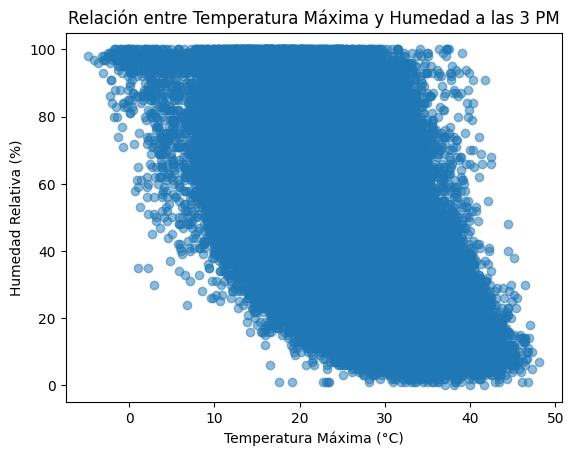

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(f_data['MaxTemp'], f_data['Humidity3pm'], alpha=0.5)
plt.title('Relación entre Temperatura Máxima y Humedad a las 3 PM')
plt.xlabel('Temperatura Máxima (°C)')
plt.ylabel('Humedad Relativa (%)')
plt.show()


La siguiente grafica nos muestra una aparente relacion inversa entre la temperatura y la humedad, ya que a medida que la temperatura aumenta, podemos notar cierta tendencia a que la humedad disminuya, esto se debe que el aire más caliente puede retener más humedad, reduciendo la humedad relativa

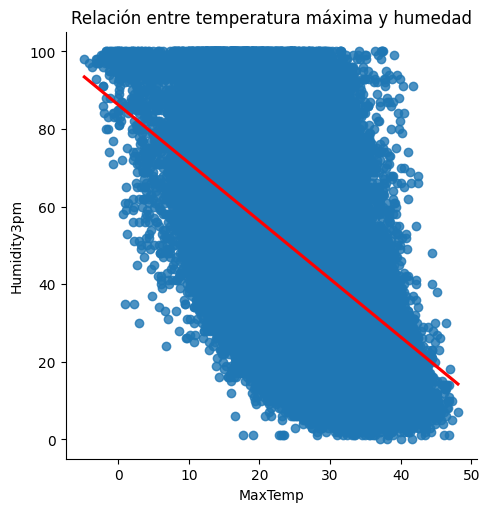

In [ ]:
#Gráfico de dispersión con ajuste de regresión
sns.lmplot(data=data, x='MaxTemp', y='Humidity3pm', line_kws={'color': 'red'})
plt.title("Relación entre temperatura máxima y humedad")
plt.show()

In [ ]:
#Calcular el VIF
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = filtered_data[['MaxTemp', 'Humidity9am']]
vif_data = pd.DataFrame()
vif_data["Variable"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)

      Variable       VIF
0      MaxTemp  4.536961
1  Humidity9am  4.536961


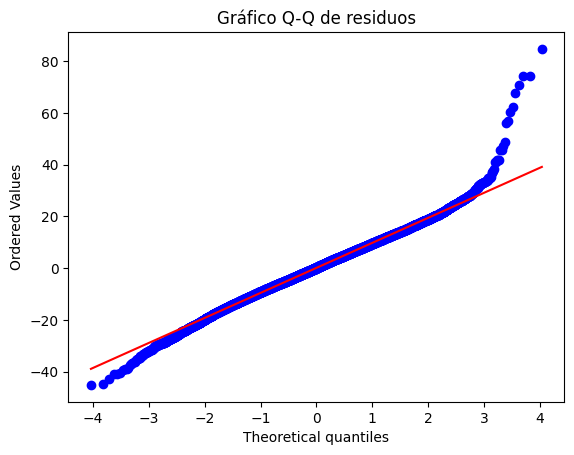

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_preds = ridge.predict(X_test)

residuos = y_test - ridge_preds
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Gráfico Q-Q de residuos")
plt.show()

In [ ]:
print(residuos)

23173      3.394282
23668      9.296810
120149     9.000576
109514     4.650383
105912    -9.095811
            ...    
100413    12.162421
59341     -0.097538
132617     9.754719
106471   -10.511471
33929      7.097780
Name: Humidity3pm, Length: 25575, dtype: float64


In [ ]:
#Prueba de Heterocedasticidad
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.tools.tools import add_constant

X_const = add_constant(X_test)
bp_test = het_breuschpagan(residuos, X_const)
print(f"Estadístico: {bp_test[0]}, P-valor: {bp_test[1]}")

Estadístico: 249.16944790012937, P-valor: 8.285546925816867e-52


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Modelo polinómico de grado 2
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Entrenar y evaluar
poly_model.fit(X, y)
y_poly_pred = poly_model.predict(X)

print("RMSE modelo polinómico:", mean_squared_error(y, y_poly_pred, squared=False))

RMSE modelo polinómico: 9.2863411601259


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


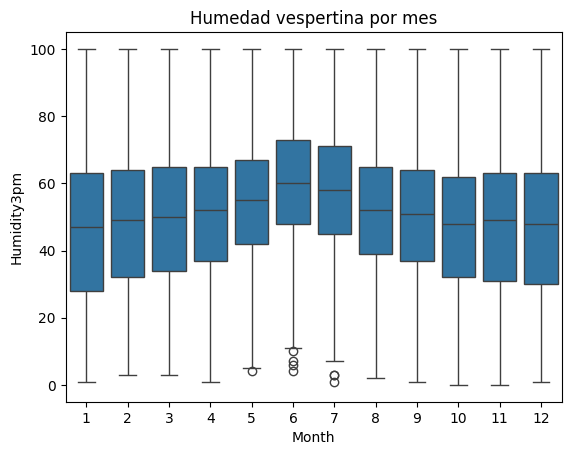

In [ ]:
#Interacción entre temperatura y nubosidad
data['Month'] = pd.to_datetime(data['Date']).dt.month

sns.boxplot(data=data, x='Month', y='Humidity3pm')
plt.title("Humedad vespertina por mes")
plt.show()
data['Temp_Cloud_Interaction'] = data['MaxTemp'] * data['Cloud3pm']

In [ ]:
import statsmodels.api as sm
# Separar variables predictoras (X) y variable dependiente (y)
X_f = f_data['MaxTemp']
y_f = f_data['Humidity3pm']

# Agregar constante a X para el modelo
X_f = sm.add_constant(X_f)

# Ajustar el modelo
model = sm.OLS(y_f, X_f).fit()

# Resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Humidity3pm   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                 4.916e+04
Date:                Tue, 26 Nov 2024   Prob (F-statistic):               0.00
Time:                        02:18:38   Log-Likelihood:            -6.0552e+05
No. Observations:              140696   AIC:                         1.211e+06
Df Residuals:                  140694   BIC:                         1.211e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.2370      0.164    526.930      0.0

## Analisis exploratorio

In [ ]:
columns_to_include = ['Humidity3pm', 'MaxTemp', 'MinTemp', 'Rainfall',
                      'WindSpeed3pm', 'Pressure3pm', 'Cloud3pm', 'Temp3pm', 'Humidity9am']

# Asegúrate de filtrar solo las columnas disponibles en el dataset original
filtered_data = data[columns_to_include].dropna()


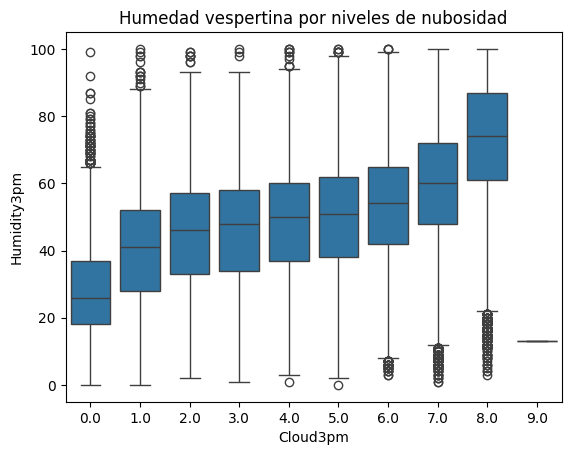

In [ ]:
#Rango de nubosidad
sns.boxplot(data=data, x='Cloud3pm', y='Humidity3pm')
plt.title("Humedad vespertina por niveles de nubosidad")
plt.show()

In [ ]:
print(filtered_data.describe())


        Humidity3pm       MaxTemp       MinTemp      Rainfall  WindSpeed3pm  \
count  81644.000000  81644.000000  81644.000000  81644.000000  81644.000000   
mean      51.262885     23.614241     12.976395      2.582233     19.499486   
std       20.812135      7.104665      6.448735      9.290576      8.675983   
min        0.000000      4.100000     -6.700000      0.000000      0.000000   
25%       36.000000     18.100000      8.100000      0.000000     13.000000   
50%       52.000000     23.000000     12.700000      0.000000     19.000000   
75%       65.000000     29.000000     17.800000      1.000000     24.000000   
max      100.000000     48.100000     31.400000    371.000000     76.000000   

        Pressure3pm      Cloud3pm       Temp3pm   Humidity9am  
count  81644.000000  81644.000000  81644.000000  81644.000000  
mean    1014.986546      4.498383     22.103077     67.684900  
std        6.988358      2.713650      6.962546     18.917697  
min      977.100000      0.00000

In [ ]:
correlation = filtered_data.corr()
print(correlation)


              Humidity3pm   MaxTemp   MinTemp  Rainfall  WindSpeed3pm  \
Humidity3pm      1.000000 -0.486354  0.015951  0.254835      0.027558   
MaxTemp         -0.486354  1.000000  0.755043 -0.053768      0.012258   
MinTemp          0.015951  0.755043  1.000000  0.112580      0.127839   
Rainfall         0.254835 -0.053768  0.112580  1.000000      0.055679   
WindSpeed3pm     0.027558  0.012258  0.127839  0.055679      1.000000   
Pressure3pm      0.037471 -0.442935 -0.482571 -0.130336     -0.247650   
Cloud3pm         0.523101 -0.277939  0.020925  0.171904      0.029228   
Temp3pm         -0.534584  0.984637  0.732543 -0.056984     -0.011405   
Humidity9am      0.694067 -0.529472 -0.226429  0.236899     -0.103206   

              Pressure3pm  Cloud3pm   Temp3pm  Humidity9am  
Humidity3pm      0.037471  0.523101 -0.534584     0.694067  
MaxTemp         -0.442935 -0.277939  0.984637    -0.529472  
MinTemp         -0.482571  0.020925  0.732543    -0.226429  
Rainfall        -0.130336

In [ ]:
import statsmodels.api as sm
# Seleccionar las columnas necesarias para el modelo
selected_columns = ['Humidity3pm', 'Humidity9am', 'Cloud3pm', 'MaxTemp', 'MinTemp', 'Temp3pm']
filtered_data = filtered_data[selected_columns].dropna()

# Separar variables predictoras (X) y variable dependiente (y)
X = filtered_data.drop(columns=['Humidity3pm'])
y = filtered_data['Humidity3pm']

# Agregar constante a X para el modelo
X = sm.add_constant(X)

# Ajustar el modelo
model = sm.OLS(y, X).fit()

# Resumen del modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            Humidity3pm   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                 5.910e+04
Date:                Wed, 27 Nov 2024   Prob (F-statistic):               0.00
Time:                        02:01:17   Log-Likelihood:            -3.0121e+05
No. Observations:               81644   AIC:                         6.024e+05
Df Residuals:                   81638   BIC:                         6.025e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          35.8472      0.272    131.923      

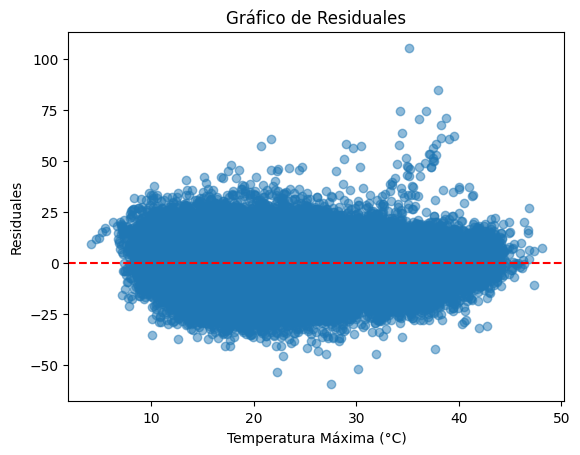

In [ ]:
residuals = model.resid
plt.scatter(filtered_data['MaxTemp'], residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Gráfico de Residuales')
plt.xlabel('Temperatura Máxima (°C)')
plt.ylabel('Residuales')
plt.show()


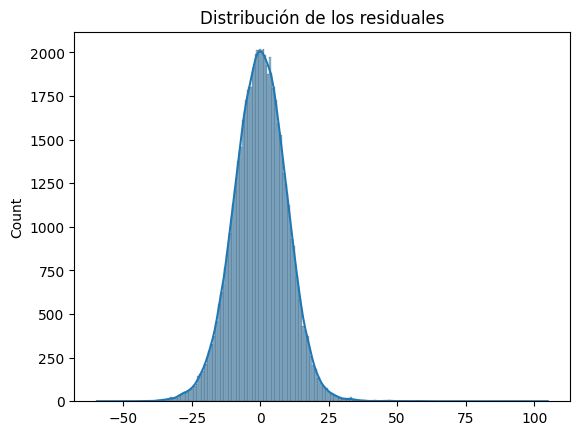

In [ ]:
import seaborn as sns

sns.histplot(model.resid, kde=True)
plt.title("Distribución de los residuales")
plt.show()


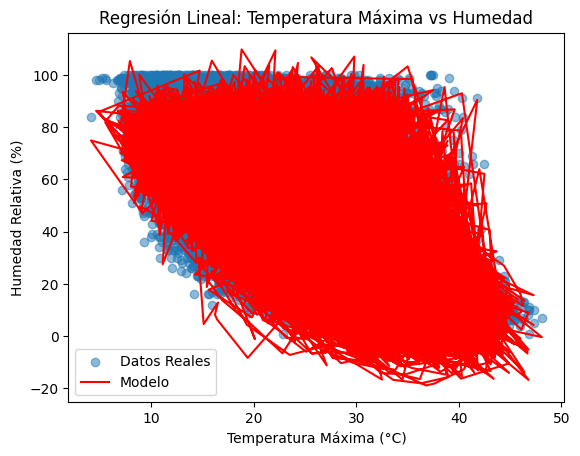

In [ ]:
# Generar predicciones
filtered_data['Predicted'] = model.predict(X)

# Graficar datos y línea de regresión
plt.scatter(filtered_data['MaxTemp'], filtered_data['Humidity3pm'], alpha=0.5, label='Datos Reales')
plt.plot(filtered_data['MaxTemp'], filtered_data['Predicted'], color='red', label='Modelo')
plt.title('Regresión Lineal: Temperatura Máxima vs Humedad')
plt.xlabel('Temperatura Máxima (°C)')
plt.ylabel('Humedad Relativa (%)')
plt.legend()
plt.show()


In [ ]:
print(filtered_data.columns)


Index(['Humidity3pm', 'Humidity9am', 'Cloud3pm', 'MaxTemp', 'MinTemp',
       'Temp3pm', 'Predicted'],
      dtype='object')


In [ ]:
fid_data = data[columns_to_include].dropna()

In [ ]:
filtered_data = filtered_data.dropna(subset=columns_to_include)


KeyError: ['Rainfall', 'WindSpeed3pm', 'Pressure3pm']

In [ ]:
corr_matrix = filtered_data.corr()
print(corr_matrix['Humidity3pm'].sort_values(ascending=False))


Humidity3pm     1.000000
Humidity9am     0.694067
Cloud3pm        0.523101
Rainfall        0.254835
Pressure3pm     0.037471
WindSpeed3pm    0.027558
MinTemp         0.015951
MaxTemp        -0.486354
Temp3pm        -0.534584
Name: Humidity3pm, dtype: float64


In [ ]:
import statsmodels.api as sm

# Función para backward elimination
def backward_elimination(data, target, significance_level=0.05):
    variables = data.columns.tolist()
    while len(variables) > 0:
        X = sm.add_constant(data[variables])  # Agregar constante
        model = sm.OLS(target, X).fit()
        p_values = model.pvalues[1:]  # Ignorar el p-valor de la constante
        max_p_value = p_values.max()

        if max_p_value > significance_level:
            excluded_variable = p_values.idxmax()
            print(f"Eliminando variable: {excluded_variable} con p-valor: {max_p_value}")
            variables.remove(excluded_variable)
        else:
            break

    print("Variables finales seleccionadas:", variables)
    return variables, model


In [ ]:
# Define las variables independientes y dependientes
X = fid_data[['Humidity9am', 'Cloud3pm', 'Rainfall', 'Pressure3pm', 'WindSpeed3pm', 'Temp3pm']]
y = fid_data['Humidity3pm']

# Aplicar backward elimination
selected_variables, final_model = backward_elimination(X, y)

# Resumen del modelo final
print(final_model.summary())


Variables finales seleccionadas: ['Humidity9am', 'Cloud3pm', 'Rainfall', 'Pressure3pm', 'WindSpeed3pm', 'Temp3pm']
                            OLS Regression Results                            
Dep. Variable:            Humidity3pm   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                 2.137e+04
Date:                Sun, 24 Nov 2024   Prob (F-statistic):               0.00
Time:                        08:11:04   Log-Likelihood:            -3.2514e+05
No. Observations:               81644   AIC:                         6.503e+05
Df Residuals:                   81637   BIC:                         6.503e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Define las variables independientes y dependientes
X = filtered_data[['Humidity9am', 'Cloud3pm', 'Rainfall', 'MaxTemp', 'Pressure3pm', 'WindSpeed3pm', 'MinTemp', 'Temp3pm']]
y = filtered_data['Humidity3pm']

# Crear modelo de regresión
model = LinearRegression()

# Aplicar RFE para seleccionar las mejores variables
selector = RFE(estimator=model, n_features_to_select=4)  # Seleccionar las 4 mejores variables
selector = selector.fit(X, y)

# Ver las variables seleccionadas
selected_features = X.columns[selector.support_]
print("Variables seleccionadas:", selected_features)

# Ajustar el modelo final con las variables seleccionadas
X_selected = X[selected_features]
model.fit(X_selected, y)
print("Coeficientes del modelo:", model.coef_)


Variables seleccionadas: Index(['Cloud3pm', 'MaxTemp', 'MinTemp', 'Temp3pm'], dtype='object')
Coeficientes del modelo: [ 1.27055811  0.79888191  2.48191202 -3.92733399]


In [ ]:
import statsmodels.api as sm

# Definir las variables X y Y basadas en el resultado del RFE
X_rfe = filtered_data[['Humidity9am','Cloud3pm', 'MaxTemp', 'MinTemp', 'Temp3pm']]
y = filtered_data['Humidity3pm']

# Agregar una constante para el modelo (intercepto)
X_rfe = sm.add_constant(X_rfe)

# Ajustar el modelo de regresión
modelo_rfe = sm.OLS(y, X_rfe).fit()

# Mostrar el resumen del modelo
print(modelo_rfe.summary())


                            OLS Regression Results                            
Dep. Variable:            Humidity3pm   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                 5.910e+04
Date:                Sun, 24 Nov 2024   Prob (F-statistic):               0.00
Time:                        08:10:30   Log-Likelihood:            -3.0121e+05
No. Observations:               81644   AIC:                         6.024e+05
Df Residuals:                   81638   BIC:                         6.025e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          35.8472      0.272    131.923      

In [ ]:
import statsmodels.api as sm

# Definir las variables X y Y basadas en el resultado del RFE
X_rfe = filtered_data[['Cloud3pm', 'MaxTemp', 'MinTemp', 'Temp3pm']]
y = filtered_data['Humidity3pm']

# Agregar una constante para el modelo (intercepto)
X_rfe = sm.add_constant(X_rfe)

# Ajustar el modelo de regresión
modelo_rfe = sm.OLS(y, X_rfe).fit()

# Mostrar el resumen del modelo
print(modelo_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:            Humidity3pm   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                 4.119e+04
Date:                Wed, 27 Nov 2024   Prob (F-statistic):               0.00
Time:                        02:01:24   Log-Likelihood:            -3.1859e+05
No. Observations:               81644   AIC:                         6.372e+05
Df Residuals:                   81639   BIC:                         6.372e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.2823      0.200    405.991      0.0

MSE: 94.20811887905953
R2: 0.7793952890341729
                            OLS Regression Results                            
Dep. Variable:            Humidity3pm   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                 4.871e+04
Date:                Wed, 27 Nov 2024   Prob (F-statistic):               0.00
Time:                        02:01:55   Log-Likelihood:            -2.5188e+05
No. Observations:               68197   AIC:                         5.038e+05
Df Residuals:                   68191   BIC:                         5.038e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
cons

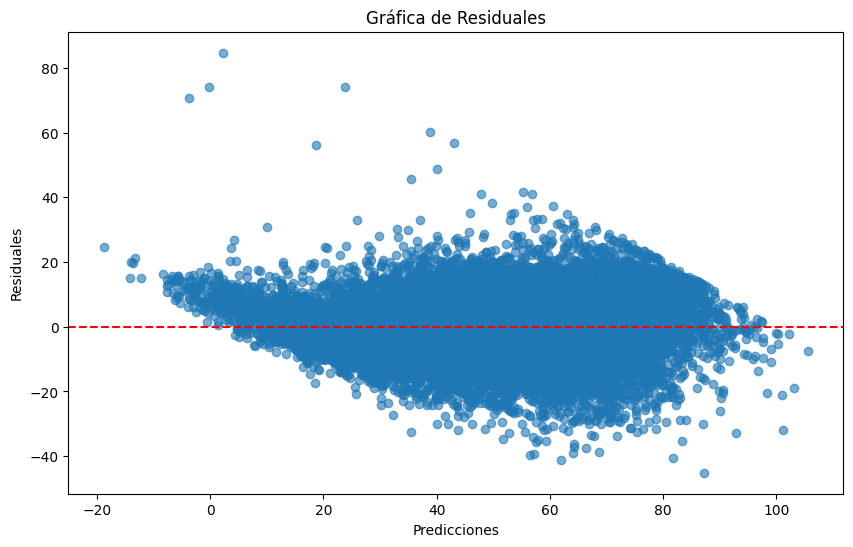

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

# copia limpia del dataset original
filtered_data = data.copy()

# Seleccionar las columnas necesarias para el modelo
selected_columns = ['Humidity3pm', 'Humidity9am', 'Cloud3pm', 'MaxTemp', 'MinTemp', 'Temp3pm']
filtered_data = filtered_data[selected_columns].dropna()

# Separar variables predictoras (X) y variable dependiente (y)
X = filtered_data.drop(columns=['Humidity3pm'])
y = filtered_data['Humidity3pm']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo usando scikit-learn
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"R2: {r2}")

# Resumen del modelo con statsmodels
X_train_sm = sm.add_constant(X_train)  # Agregar constante para statsmodels
ols_model = sm.OLS(y_train, X_train_sm).fit()
print(ols_model.summary())

# Gráfica de residuales
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Gráfica de Residuales")
plt.xlabel("Predicciones")
plt.ylabel("Residuales")
plt.show()


In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.api import add_constant

# Crear la matriz de predictores (X) con constante añadida
X = data[['Humidity9am', 'Cloud3pm', 'MaxTemp', 'MinTemp', 'Temp3pm']]
X_const = add_constant(X)

# Calcular residuos manualmente para los datos de prueba
residuals = y_test - y_pred

# Realizar la prueba de Breusch-Pagan
bp_test = het_breuschpagan(residuals, add_constant(X_test))
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))


{'LM Statistic': 159.34150607016957, 'LM-Test p-value': 1.3673965442592906e-32, 'F-Statistic': 32.15761695064731, 'F-Test p-value': 9.665517394712552e-33}


In [ ]:
data['Humidity3pm_log'] = np.log(data['Humidity3pm'] + 1)


In [ ]:
from statsmodels.regression.linear_model import WLS

# Calcular los pesos (usualmente el inverso de los residuos)
weights = 1 / (residuals**2 + 1e-6)  # Agrega un pequeño valor para evitar divisiones por cero

# Ajustar un modelo ponderado
wls_model = WLS(y_test, add_constant(X_test), weights=weights).fit()
print(wls_model.summary())


                            WLS Regression Results                            
Dep. Variable:            Humidity3pm   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.734e+07
Date:                Sun, 24 Nov 2024   Prob (F-statistic):               0.00
Time:                        08:47:03   Log-Likelihood:                -51816.
No. Observations:               17050   AIC:                         1.036e+05
Df Residuals:                   17044   BIC:                         1.037e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          35.5380      0.013   2746.621      

In [ ]:
ols_model_robust = sm.OLS(y_train, add_constant(X_train)).fit(cov_type='HC3')
print(ols_model_robust.summary())


                            OLS Regression Results                            
Dep. Variable:            Humidity3pm   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                 4.869e+04
Date:                Sun, 24 Nov 2024   Prob (F-statistic):               0.00
Time:                        08:43:32   Log-Likelihood:            -2.5188e+05
No. Observations:               68197   AIC:                         5.038e+05
Df Residuals:                   68191   BIC:                         5.038e+05
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          35.5444      0.316    112.578      

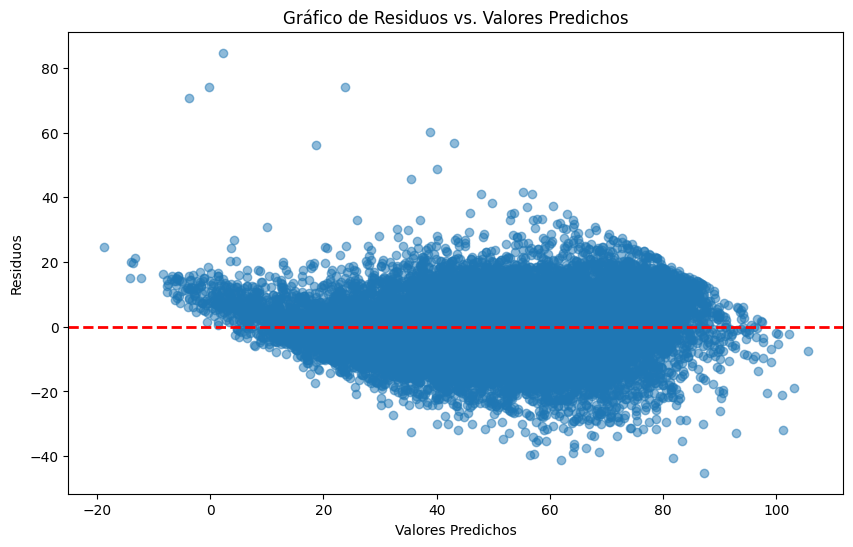

In [ ]:
import matplotlib.pyplot as plt

# Graficar los residuos contra los valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos vs. Valores Predichos')
plt.show()


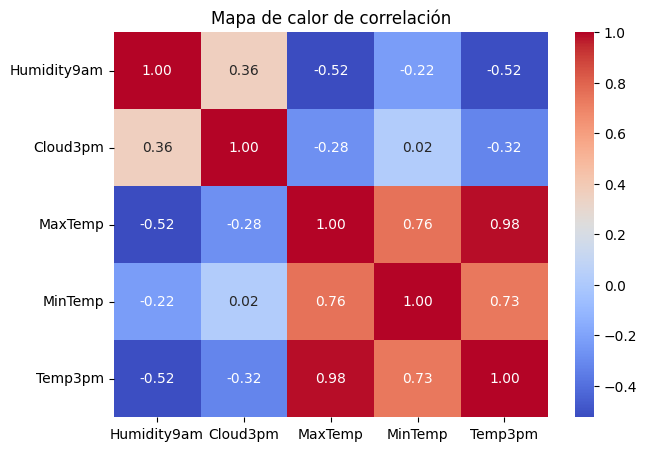

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Mapa de calor de correlación
plt.figure(figsize=(7, 5))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor de correlación")
plt.show()

In [ ]:
import statsmodels.api as sm

# Ajustar el modelo original con errores estándar robustos
X_const = sm.add_constant(X_train)  # Agregar constante al modelo
ols_model_robust = sm.OLS(y_train, X_const).fit(cov_type='HC3')  # HC3 es un tipo comúnmente usado
print(ols_model_robust.summary())


                            OLS Regression Results                            
Dep. Variable:            Humidity3pm   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                 4.869e+04
Date:                Sun, 24 Nov 2024   Prob (F-statistic):               0.00
Time:                        08:48:25   Log-Likelihood:            -2.5188e+05
No. Observations:               68197   AIC:                         5.038e+05
Df Residuals:                   68191   BIC:                         5.038e+05
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          35.5444      0.316    112.578      

In [ ]:
# Calcular las predicciones para el conjunto de entrenamiento
y_train_pred = model.predict(X_train)

# Calcular los residuos en el conjunto de entrenamiento
residuals_train = y_train - y_train_pred

# Calcular los pesos usando los residuos del conjunto de entrenamiento
weights_train = 1 / (residuals_train**2 + 1e-6)  # Sumar un pequeño valor para evitar divisiones por cero


In [ ]:
from statsmodels.regression.linear_model import WLS

# Crear nuevamente la matriz de diseño con una constante
X_train_const = sm.add_constant(X_train)

# Ajustar el modelo ponderado con los pesos del conjunto de entrenamiento
wls_model = WLS(y_train, X_train_const, weights=weights_train).fit()

# Mostrar el resumen del modelo
print(wls_model.summary())


                            WLS Regression Results                            
Dep. Variable:            Humidity3pm   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.062e+08
Date:                Sun, 24 Nov 2024   Prob (F-statistic):               0.00
Time:                        08:50:23   Log-Likelihood:            -2.0657e+05
No. Observations:               68197   AIC:                         4.131e+05
Df Residuals:                   68191   BIC:                         4.132e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          35.5431      0.003   1.06e+04      

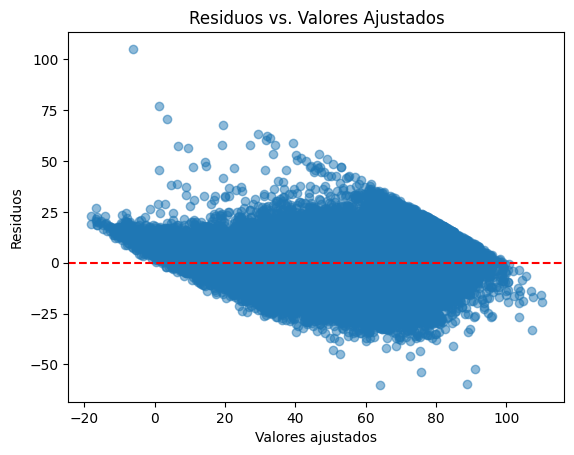

In [ ]:
residuals = wls_model.resid

# Gráfico de residuos
import matplotlib.pyplot as plt
plt.scatter(wls_model.fittedvalues, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.title('Residuos vs. Valores Ajustados')
plt.show()


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print(vif_data)


      Variable         VIF
0  Humidity9am    7.900195
1     Cloud3pm    4.875924
2      MaxTemp  416.054562
3      MinTemp   11.970810
4      Temp3pm  389.729489


In [ ]:
corr_matrix = X.corr()
print(corr_matrix)


             Humidity9am  Cloud3pm   MaxTemp   MinTemp   Temp3pm
Humidity9am     1.000000  0.357326 -0.504110 -0.232899 -0.498399
Cloud3pm        0.357326  1.000000 -0.277921  0.021605 -0.317420
MaxTemp        -0.504110 -0.277921  1.000000  0.736555  0.984503
MinTemp        -0.232899  0.021605  0.736555  1.000000  0.708906
Temp3pm        -0.498399 -0.317420  0.984503  0.708906  1.000000


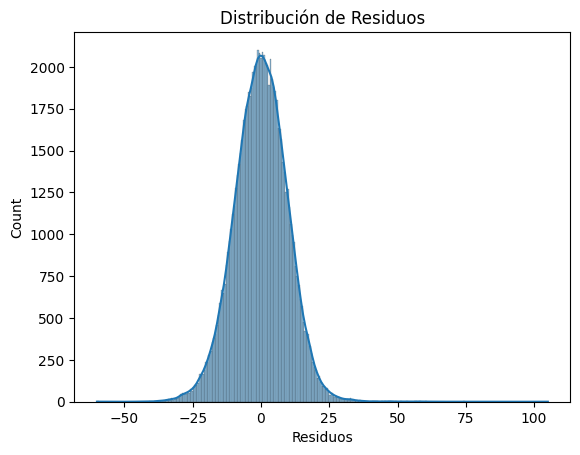

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y - model.predict(X)
sns.histplot(residuals, kde=True)
plt.title("Distribución de Residuos")
plt.xlabel("Residuos")
plt.show()


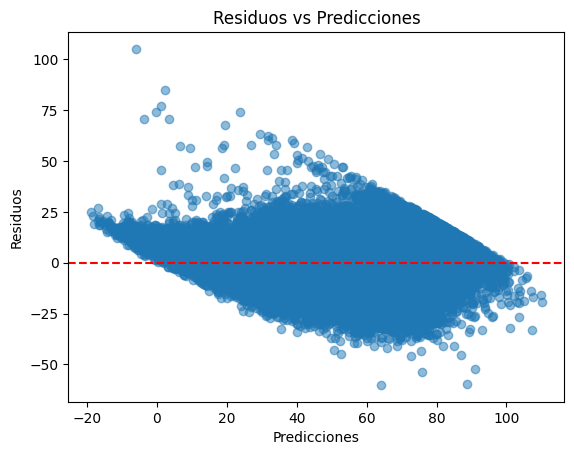

In [ ]:
#Buscar indicadores de heterocedasticidad

plt.scatter(model.predict(X), residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuos vs Predicciones")
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.show()


In [ ]:
#Trararla
from statsmodels.regression.linear_model import WLS

weights = 1 / (residuals ** 2)
wls_model = WLS(y, X, weights=weights).fit()
print(wls_model.summary())


                                 WLS Regression Results                                
Dep. Variable:            Humidity3pm   R-squared (uncentered):                   0.999
Model:                            WLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          2.697e+07
Date:                Wed, 27 Nov 2024   Prob (F-statistic):                        0.00
Time:                        02:16:33   Log-Likelihood:                     -6.4973e+05
No. Observations:               85247   AIC:                                  1.299e+06
Df Residuals:                   85242   BIC:                                  1.300e+06
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [ ]:
y_transformed = np.log(y)  # Ejemplo de transformación logarítmica


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
# 1. Importar las librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 2. Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Ajustar el modelo con los datos de entrenamiento
from sklearn.linear_model import LinearRegression
model = LinearRegression()  # Puedes cambiar a otro modelo si lo deseas
model.fit(X_train, y_train)

# 4. Hacer predicciones en los datos de prueba
y_pred = model.predict(X_test)

# 5. Calcular métricas de evaluación
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 6. Calcular el error relativo promedio (MAPE o similar)
error_relativo_promedio = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# 7. Imprimir los resultados
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")
print(f"Error relativo promedio: {error_relativo_promedio:.2f}%")


RMSE: 9.7043
MAE: 7.6261
R²: 0.7812
Error relativo promedio: 19.69%


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f"RMSE: {rmse}, MAE: {mae}")


RMSE: 9.70376534407428, MAE: 7.626388100980494


In [ ]:
mean_humidity = y_test.mean()
error_percentage = (rmse / mean_humidity) * 100
print(f"Error relativo promedio: {error_percentage:.2f}%")


Error relativo promedio: 17.79%


In [ ]:
#Validacion cruzada
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')
print(f"RMSE promedio en validación cruzada: {-scores.mean()}")


RMSE promedio en validación cruzada: 9.841388430284749


Intento de random forest

In [ ]:
# Importar librerías necesarias
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir el modelo de Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Definir los parámetros a optimizar con GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árboles en el bosque
    'max_depth': [None, 10, 20, 30],  # Profundidad máxima de cada árbol
    'min_samples_split': [2, 5, 10],  # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Mínimo de muestras para ser hoja
    'max_features': ['auto', 'sqrt', 'log2']  # Número de características a considerar en cada división
}

# Realizar búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado por GridSearchCV
best_rf_model = grid_search.best_estimator_

# Predicciones con el modelo entrenado
y_pred = best_rf_model.predict(X_test)

# Calcular métricas de evaluación
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calcular el Error Relativo Promedio
erro_relativo_promedio = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Mostrar resultados
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")
print(f"Error relativo promedio: {erro_relativo_promedio:.2f}%")

# Mostrar el mejor conjunto de hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGKILL(-9)}

In [ ]:
from sklearn.model_selection import GridSearchCV

# Reducir el tamaño de los datos para la búsqueda de hiperparámetros
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=42)

# Parámetros del Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# GridSearchCV con validación cruzada y reducción de trabajos paralelos
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=1, scoring='neg_mean_squared_error')
grid_search.fit(X_train_small, y_train_small)

# Mejor modelo
best_rf_model = grid_search.best_estimator_

# Predicciones y métricas
y_pred = best_rf_model.predict(X_test)

# Métricas de evaluación
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
erro_relativo_promedio = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Mostrar los resultados
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")
print(f"Error relativo promedio: {erro_relativo_promedio:.2f}%")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

RMSE: 9.4890
MAE: 7.3255
R²: 0.7908
Error relativo promedio: 17.97%


In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']  # Cambié 'auto' a 'sqrt' y 'log2'
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_rf_model = grid_search.best_estimator_

# Predicciones y métricas
y_pred = best_rf_model.predict(X_test)

# Métricas de evaluación
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
erro_relativo_promedio = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Mostrar los resultados
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")
print(f"Error relativo promedio: {erro_relativo_promedio:.2f}%")


RMSE: 9.1861
MAE: 7.0536
R²: 0.8039
Error relativo promedio: 17.22%


Intento de correlacion cruzada

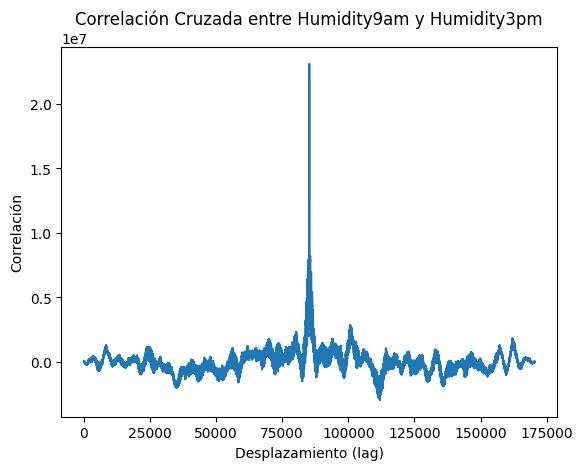

El máximo de la correlación cruzada ocurre en un desplazamiento de 0 unidades.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Suponiendo que X['Humidity9am'] es la variable predictora y y es la variable objetivo
# Convierte tus datos en arrays de numpy
predictor = X['Humidity9am'].values  # Cambia esto según el nombre de tu predictor
target = y.values  # La variable objetivo

# Realizar la correlación cruzada con desplazamientos
correlation = np.correlate(predictor - predictor.mean(), target - target.mean(), mode='full')

# Obtener el desplazamiento (lag) en el que ocurre la máxima correlación
lag = np.argmax(correlation) - (len(target) - 1)

# Graficar la correlación cruzada
plt.plot(correlation)
plt.title('Correlación Cruzada entre Humidity9am y Humidity3pm')
plt.xlabel('Desplazamiento (lag)')
plt.ylabel('Correlación')
plt.show()

# Mostrar el desplazamiento donde la correlación es máxima
print(f"El máximo de la correlación cruzada ocurre en un desplazamiento de {lag} unidades.")


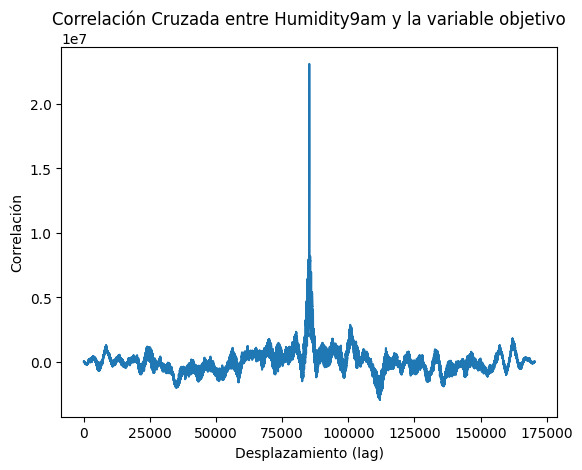

Para Humidity9am, el máximo de la correlación cruzada ocurre en un desplazamiento de 0 unidades.


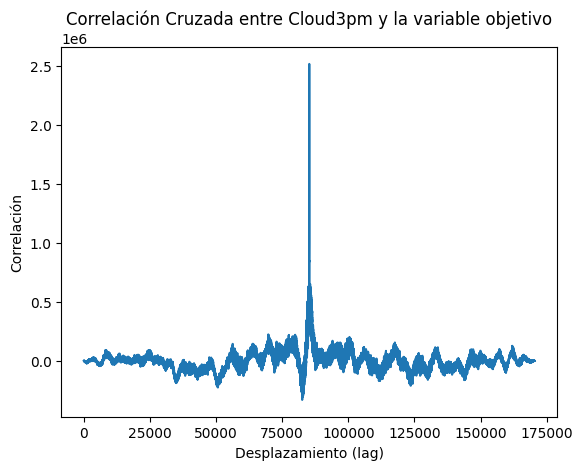

Para Cloud3pm, el máximo de la correlación cruzada ocurre en un desplazamiento de 0 unidades.


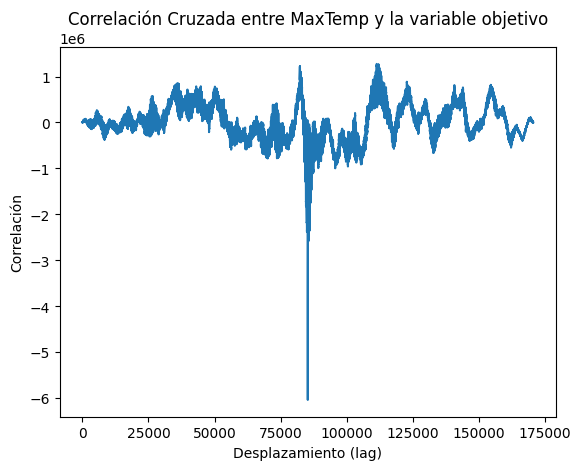

Para MaxTemp, el máximo de la correlación cruzada ocurre en un desplazamiento de 26056 unidades.


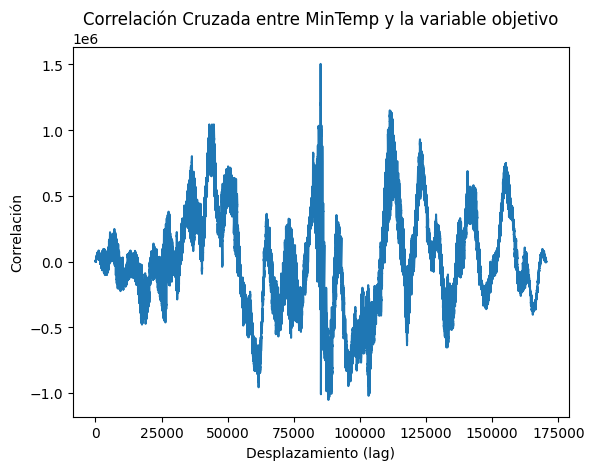

Para MinTemp, el máximo de la correlación cruzada ocurre en un desplazamiento de -111 unidades.


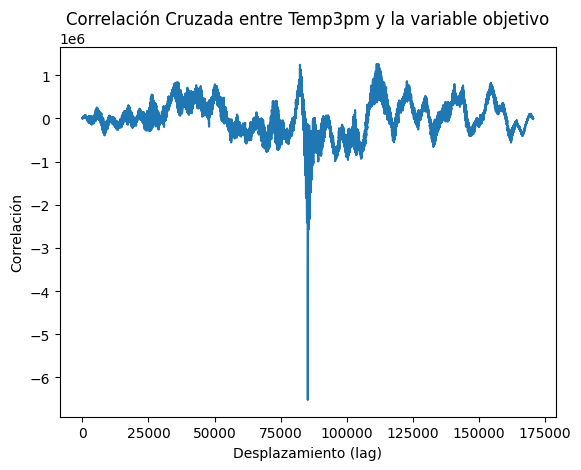

Para Temp3pm, el máximo de la correlación cruzada ocurre en un desplazamiento de 26056 unidades.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Asumiendo que X son tus variables predictoras y 'y' es tu variable objetivo
predictor_columns = ['Humidity9am', 'Cloud3pm', 'MaxTemp', 'MinTemp', 'Temp3pm']  # Reemplaza con las columnas que te interesen
target = y.values  # Tu variable objetivo

# Calcular la correlación cruzada entre cada predictor y el objetivo
for predictor_name in predictor_columns:
    predictor = X[predictor_name].values  # Obtén la columna de predictor
    correlation = np.correlate(predictor - predictor.mean(), target - target.mean(), mode='full')

    # Obtener el lag de la máxima correlación
    lag = np.argmax(correlation) - (len(target) - 1)

    # Graficar la correlación cruzada
    plt.plot(correlation)
    plt.title(f'Correlación Cruzada entre {predictor_name} y la variable objetivo')
    plt.xlabel('Desplazamiento (lag)')
    plt.ylabel('Correlación')
    plt.show()

    print(f"Para {predictor_name}, el máximo de la correlación cruzada ocurre en un desplazamiento de {lag} unidades.")
